# 📌 **Atividade: Exploração de Atributos no Dataset do Titanic**  

## 🎯 **Objetivo**  
Nesta atividade, você irá explorar os dados do **Titanic Dataset**, identificando padrões, analisando distribuições e interpretando correlações.  

## 📂 **Material Necessário**  
- Python instalado (ou Google Colab)  
- Bibliotecas: `pandas`, `numpy`, `matplotlib`, `seaborn`  
- Dataset: **Titanic Dataset** (pode ser baixado do [Kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset)) ou carregado diretamente pelo `seaborn`.



## Dicionário de Dados

| **Coluna**       | **Descrição**                                              | **Tipo de Dado** |
|------------------|----------------------------------------------------------|-----------------|
| `survived`      | Indica se o passageiro sobreviveu (1 = Sim, 0 = Não)     | Numérico (int) |
| `pclass`        | Classe do bilhete (1 = Primeira, 2 = Segunda, 3 = Terceira) | Numérico (int) |
| `sex`           | Sexo do passageiro (`male` = Masculino, `female` = Feminino) | Categórico (string) |
| `age`           | Idade do passageiro                                        | Numérico (float) |
| `sibsp`         | Número de irmãos/cônjuges a bordo                         | Numérico (int) |
| `parch`         | Número de pais/filhos a bordo                             | Numérico (int) |
| `fare`          | Tarifa paga pelo bilhete                                  | Numérico (float) |
| `embarked`      | Porto de embarque (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton) | Categórico (string) |
| `class`         | Classe do passageiro (`First`, `Second`, `Third`)        | Categórico (string) |
| `who`           | Tipo de passageiro (`man`, `woman`, `child`)             | Categórico (string) |
| `adult_male`    | Indica se o passageiro é um homem adulto (`True`, `False`) | Booleano |
| `deck`          | Deck da cabine (letras `A` a `G`, ou `NaN` se desconhecido) | Categórico (string) |
| `embark_town`   | Nome do porto de embarque (`Cherbourg`, `Queenstown`, `Southampton`) | Categórico (string) |
| `alive`         | Indica se o passageiro sobreviveu (`yes`, `no`)           | Categórico (string) |
| `alone`         | Indica se o passageiro estava viajando sozinho (`True`, `False`) | Booleano |

## 📍 **Parte 0: Importação das bibliotecas**

  Vamos importar as bibliotecas necessárias para a análise exploratória dos dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

## 📝 **Parte 1: Carregando e Explorando os Dados**  

1. Carregue o dataset em um DataFrame.  
2. Exiba as primeiras linhas do dataset.  
3. Verifique a estrutura geral dos dados (quantidade de linhas e colunas).  
4. Liste os nomes das colunas e seus respectivos tipos de dados.  
5. Conte a quantidade de valores ausentes em cada coluna.  

```python
# Carregar o dataset diretamente do seaborn
df = sns.load_dataset("titanic")

# Exibir as primeiras linhas
print(df.head())

# Exibir informações gerais
print(df.info())

# Contar valores ausentes
print(df.isnull().sum())
```

🎁 **Tarefa:**  
- Quantas amostras e quantos atributos existem no dataset?  
- O dataset contém valores ausentes? Se sim, quais colunas são afetadas?  
- Quais são os tipos de dados presentes? Há colunas numéricas e categóricas?

---

In [2]:
# Carregar o dataset diretamente do seaborn
df = sns.load_dataset("titanic")

# Exibir atributos do dataset
print("Atributos do dataset:")
print(df.info())

# Contar e mostrar somente colunas com valores nulos
print("\nColunas com valores nulos:")
for col in df.columns:
    if df[col].isnull().sum():
        print(f'{col}: {df[col].isnull().sum()}')

# Exibir somente informações de colunas e tipos de dados
print(f'\nTipos de dados: {df.dtypes.unique()}')


Atributos do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Colunas com valores nulos:
age: 177
embarked: 2
dec

**Respostas:**  
- Quantas amostras e quantos atributos existem no dataset?

R: Existem 891 amostras e 15 atributos.

- O dataset contém valores ausentes? Se sim, quais colunas são afetadas?

R: Sim, as colunas `age`: 177, `embarked`: 2, `deck`: 688 e `embark_town`: 2, contêm valores ausentes.

- Quais são os tipos de dados presentes? Há colunas numéricas e categóricas?

R: Sim, o dataset contém colunas numéricas (`int` e `float`), categóricos (`object` e `category`) e booleanos (`bool`).


## 📊 **Parte 2: Estatísticas Descritivas**  

1. Gere estatísticas descritivas das colunas numéricas.  
2. Verifique os valores únicos das colunas categóricas.  

```python
# Estatísticas descritivas para colunas numéricas
print(df.describe())

# Verificar valores únicos em colunas categóricas
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Valores únicos em {col}: {df[col].unique()}")

# Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'fare', 'sibsp', 'parch']])
plt.xticks(rotation=90)
plt.show()
```

🎁 **Tarefa:**  
- Qual é a média, mediana, mínimo e máximo de cada atributo numérico?  
- Há atributos com valores discrepantes (outliers)?  
- Quantos valores diferentes existem nas colunas categóricas?  

---

Coluna: survived
  Média: 0.38
  Mediana: 0.00
  Mínimo: 0.00
  Máximo: 1.00

Coluna: pclass
  Média: 2.31
  Mediana: 3.00
  Mínimo: 1.00
  Máximo: 3.00

Coluna: age
  Média: 29.70
  Mediana: 28.00
  Mínimo: 0.42
  Máximo: 80.00

Coluna: sibsp
  Média: 0.52
  Mediana: 0.00
  Mínimo: 0.00
  Máximo: 8.00

Coluna: parch
  Média: 0.38
  Mediana: 0.00
  Mínimo: 0.00
  Máximo: 6.00

Coluna: fare
  Média: 32.20
  Mediana: 14.45
  Mínimo: 0.00
  Máximo: 512.33

sex ['male' 'female']: 2 valores únicos
embarked ['S' 'C' 'Q']: 3 valores únicos
class ['Third' 'First' 'Second']: 3 valores únicos
who ['man' 'woman' 'child']: 3 valores únicos
deck ['C' 'E' 'G' 'D' 'A' 'B' 'F']: 7 valores únicos
embark_town ['Southampton' 'Cherbourg' 'Queenstown']: 3 valores únicos
alive ['no' 'yes']: 2 valores únicos


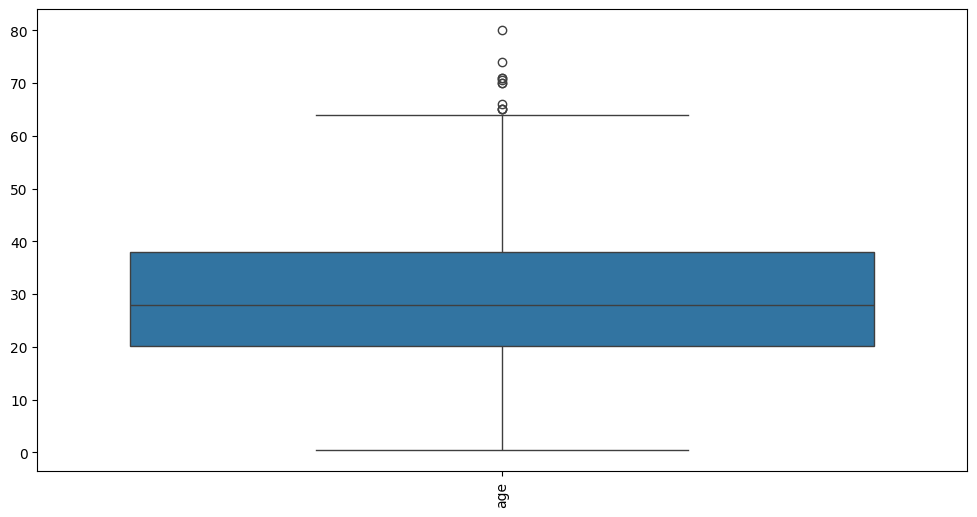

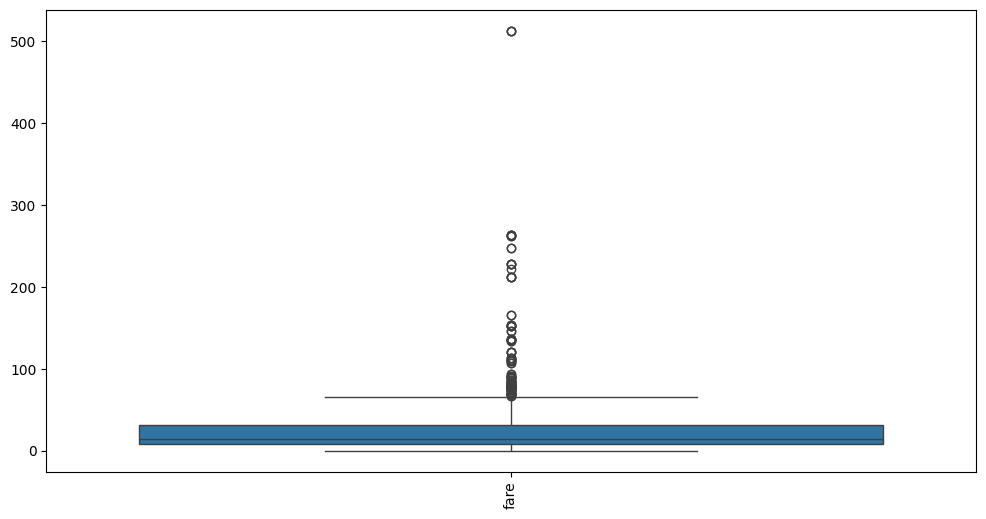

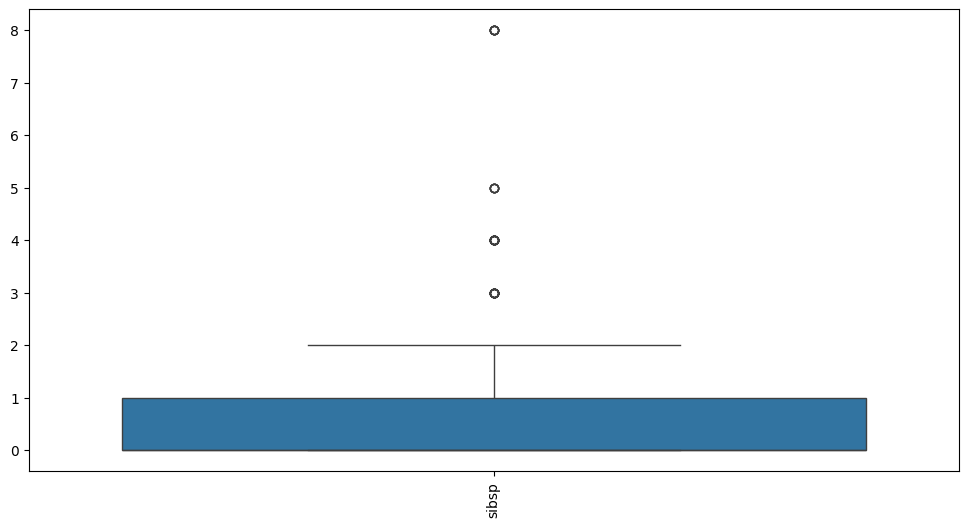

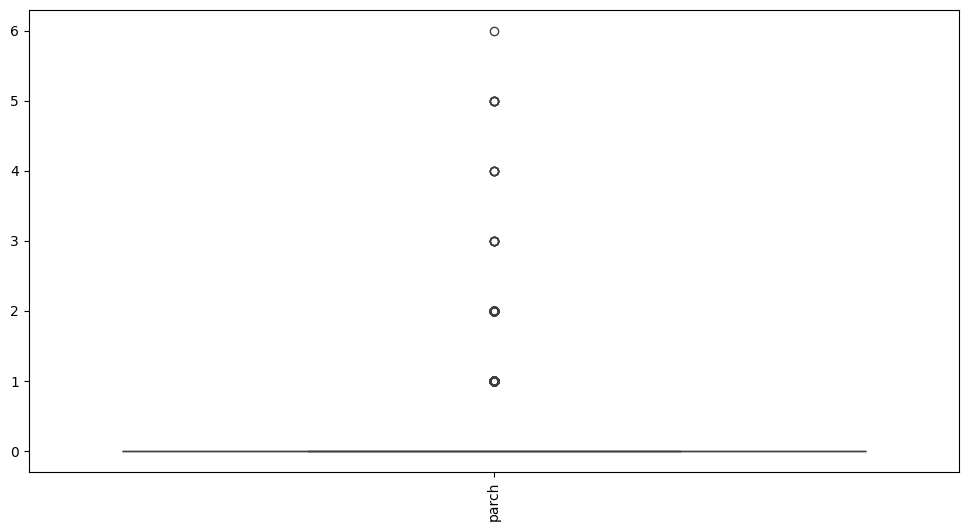

In [3]:
# Estatísticas descritivas para colunas numéricas
desc = df.describe()

# describe somente para variáveis numéricas com mean, median, min e max
for col in desc.columns:
    print(f"Coluna: {col}")
    print(f"  Média: {desc[col]['mean']:.2f}")
    print(f"  Mediana: {desc[col]['50%']:.2f}")
    print(f"  Mínimo: {desc[col]['min']:.2f}")
    print(f"  Máximo: {desc[col]['max']:.2f}")
    print()

# Verificar valores únicos diferente de NaN em colunas categóricas
for col in df.select_dtypes(include=['object', 'category']).columns:
    valores_unicos = df[col].dropna().astype('object').unique()
    print(f"{col} {valores_unicos}: {len(valores_unicos)} valores únicos")

# Boxplot para age
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age']])
plt.xticks(rotation=90)
plt.show()

# Boxplot para fare
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['fare']])
plt.xticks(rotation=90)
plt.show()

# Boxplot para sibsp
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['sibsp']])
plt.xticks(rotation=90)
plt.show()

# Boxplot para parch
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['parch']])
plt.xticks(rotation=90)
plt.show()

**Respostas:**  
- Qual é a média, mediana, mínimo e máximo de cada atributo numérico?

R:

    Coluna: survived
    Média: 0.38
    Mediana: 0.00
    Mínimo: 0.00
    Máximo: 1.00

    Coluna: pclass
    Média: 2.31
    Mediana: 3.00
    Mínimo: 1.00
    Máximo: 3.00

    Coluna: age
    Média: 29.70
    Mediana: 28.00
    Mínimo: 0.42
    Máximo: 80.00

    Coluna: sibsp
    Média: 0.52
    Mediana: 0.00
    Mínimo: 0.00
    Máximo: 8.00

    Coluna: parch
    Média: 0.38
    Mediana: 0.00
    Mínimo: 0.00
    Máximo: 6.00

    Coluna: fare
    Média: 32.20
    Mediana: 14.45
    Mínimo: 0.00
    Máximo: 512.33
    
- Há atributos com valores discrepantes (outliers)?

R: Sim, em todos os atributos numéricos existem valores discrepantes (outliers) que estão fora do intervalo interquartil.

- Quantos valores diferentes existem nas colunas categóricas?

R:

sex ['male' 'female']: 2 únicos

embarked ['S' 'C' 'Q']: 3 únicos

class ['Third' 'First' 'Second']: 3 únicos

who ['man' 'woman' 'child']: 3 únicos

deck [nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']: 8 únicos

embark_town ['Southampton' 'Cherbourg' 'Queenstown']: 3 únicos

alive ['no' 'yes']: 2 únicos

## 📉 **Parte 3: Análise Visual dos Dados**  

1. Plote histogramas para visualizar a distribuição dos atributos numéricos.  
2. Crie um boxplot para identificar possíveis outliers.  
3. Construa um mapa de calor para observar correlações entre os atributos.  
4. Visualize a proporção de sobreviventes no dataset.  

```python
# Histograma das variáveis numéricas
df.hist(figsize=(12, 8), bins=20)
plt.show()

# Boxplot de alguns atributos
plt.figure(figsize=(6, 4))
sns.countplot(x="survived", hue="survived", data=df, palette="pastel", legend=False)
plt.title("Distribuição de Sobreviventes")
plt.show()

# Mapa de calor de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Contagem de sobreviventes
plt.figure(figsize=(6, 4))
sns.countplot(x="survived", data=df, palette="pastel")
plt.title("Distribuição de Sobreviventes")
plt.show()
```

🎁 **Tarefa:**  
- Algum atributo tem uma distribuição muito desigual?  
- Há indícios de valores discrepantes? Em quais colunas?  
- Quais atributos parecem estar mais correlacionados? Essa correlação faz sentido?  
- Qual a proporção de sobreviventes no dataset?  

---

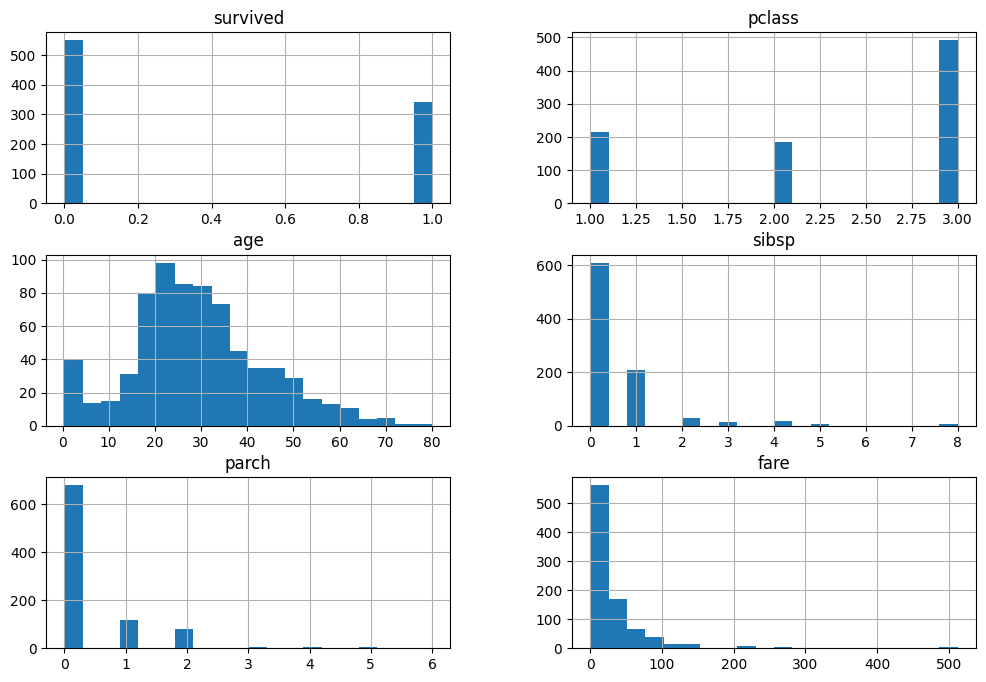

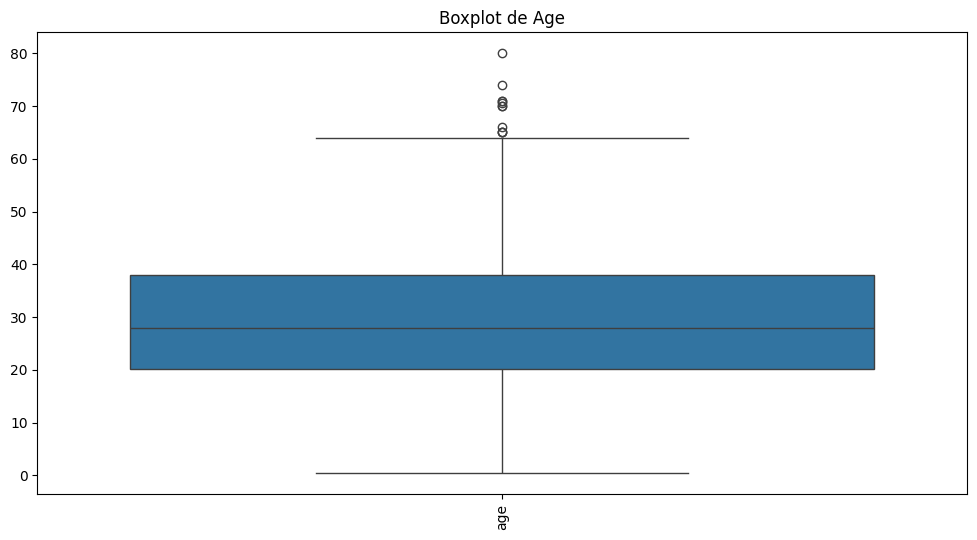

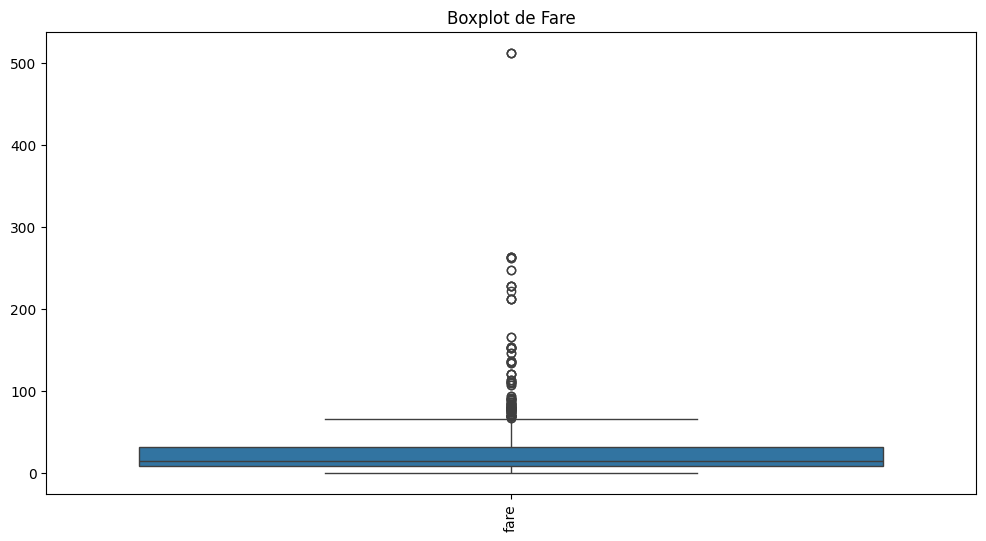

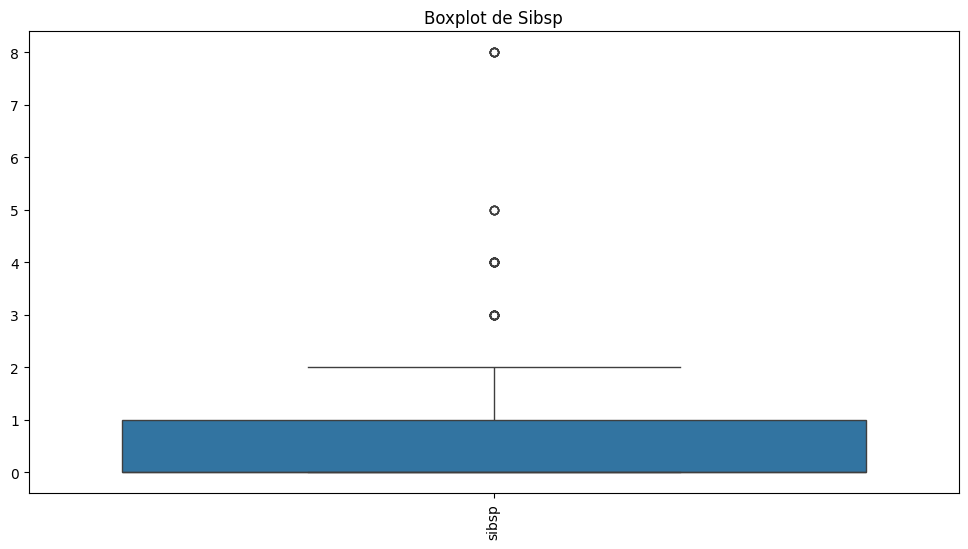

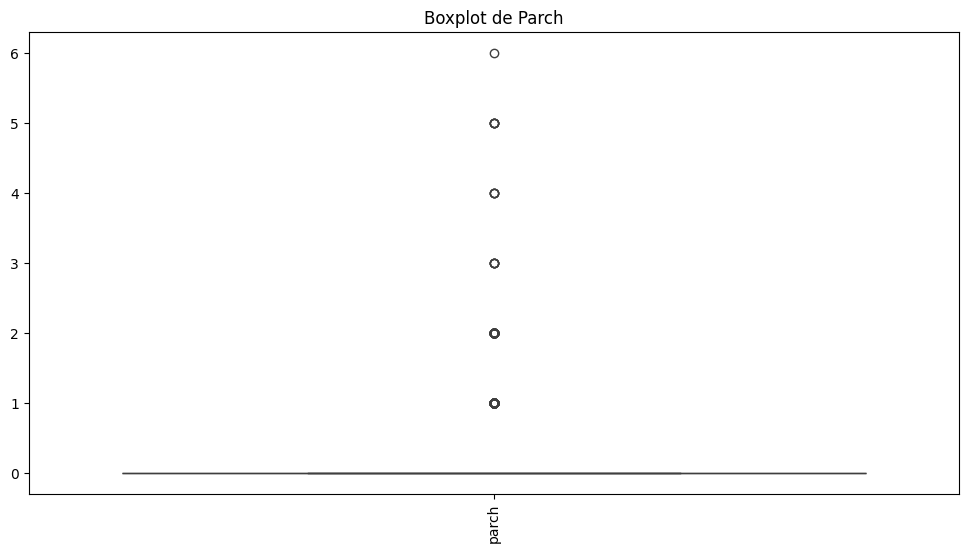

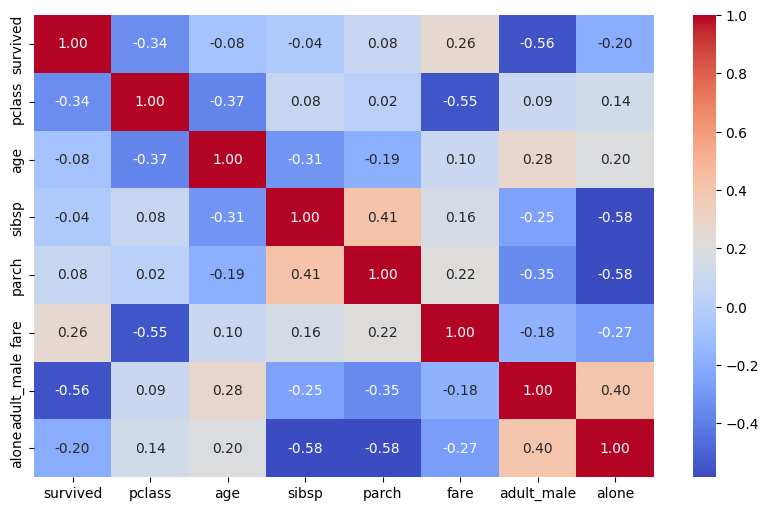

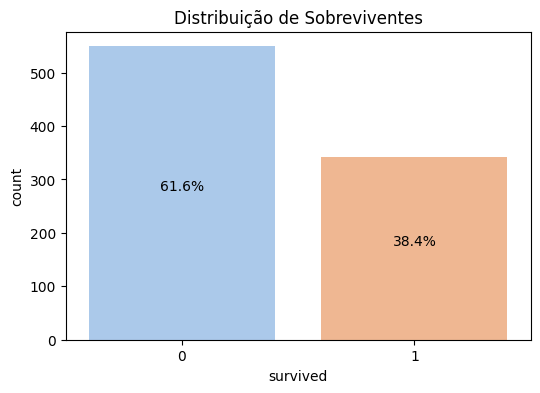

In [4]:
# Histograma das variáveis numéricas
df.hist(figsize=(12, 8), bins=20)
plt.show()

# Boxplot de alguns atributos

# Boxplot para age
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age']])
plt.title("Boxplot de Age")
plt.xticks(rotation=90)
plt.show()

# Boxplot para fare
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['fare']])
plt.title("Boxplot de Fare")
plt.xticks(rotation=90)
plt.show()

# Boxplot para sibsp
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['sibsp']])
plt.title("Boxplot de Sibsp")
plt.xticks(rotation=90)
plt.show()

# Boxplot para parch
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['parch']])
plt.title("Boxplot de Parch")
plt.xticks(rotation=90)
plt.show()

# Mapa de calor de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Calcular as porcentagens
percentual = df['survived'].value_counts(normalize=True) * 100

# Gerar o countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="survived", hue="survived", data=df, palette="pastel", legend=False)
plt.title("Distribuição de Sobreviventes")

# Adicionar os rótulos de porcentagem em cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    porcentagem = f'{(height / total) * 100:.1f}%'
    ax.annotate(porcentagem, 
                (p.get_x() + p.get_width() / 2, height / 2), 
                ha='center', 
                va='bottom')

plt.show()

**Respostas:**
- Algum atributo tem uma distribuição muito desigual?

R: Sim, a distribuição de `sibsp` e `parch` é desigual, com a maioria dos valores concentrados em 0.


- Há indícios de valores discrepantes? Em quais colunas?

R: Sim, há indícios de valores discrepantes em todas as colunas numéricas, como observado nos boxplots, mas principalmente em `fare` e `age` que possuem valores muito altos.


- Quais atributos parecem estar mais correlacionados? Essa correlação faz sentido?

R: Os atributos `pclass` e `fare` parecem estar correlacionados negativamente, o que faz sentido, pois a classe do bilhete pode influenciar o preço da tarifa. Outros atributos, `survived` e `fare` também parecem ter uma correlação positiva, indicando que passageiros que pagaram mais podem ter tido maior chance de sobrevivência. Também há uma relação negativa entre `adult_male` e `survived`, indicando que homens adultos tiveram menor chance de sobrevivência.


- Qual a proporção de sobreviventes no dataset?

R: A proporção de sobreviventes no dataset é de aproximadamente 38,4%.

## 📊 **Parte 4: Análise Visual dos Dados**  

1. Plote histogramas para visualizar a distribuição das variáveis numéricas, como idade, tarifa e número de irmãos/cônjuges a bordo (SibSp).  
2. Crie um boxplot para observar a distribuição da variável **idade** e verificar possíveis outliers.  
3. Construa um gráfico de dispersão (scatter plot) para observar a relação entre **idade** e **tarifa**.  
4. Visualize a distribuição de sobreviventes no dataset utilizando um gráfico de barras.

```python
# Histogramas das variáveis numéricas
df.hist(figsize=(12, 8), bins=20)
plt.show()

# Boxplot de idade
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'])
plt.title("Distribuição da Idade")
plt.show()

# Gráfico de dispersão entre idade e tarifa
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="fare", data=df)
plt.title("Relação entre Idade e Tarifa")
plt.show()

# Contagem de sobreviventes
plt.figure(figsize=(6, 4))
sns.countplot(x="survived", data=df, palette="pastel")
plt.title("Distribuição de Sobreviventes")
plt.show()
```

🎁 **Tarefa:**  
- Há algum atributo com uma distribuição muito desigual?  
- Como os outliers afetam a distribuição da **idade**?  
- Há alguma correlação visível entre **idade** e **tarifa**?  
- Qual é a proporção de sobreviventes no dataset?

---

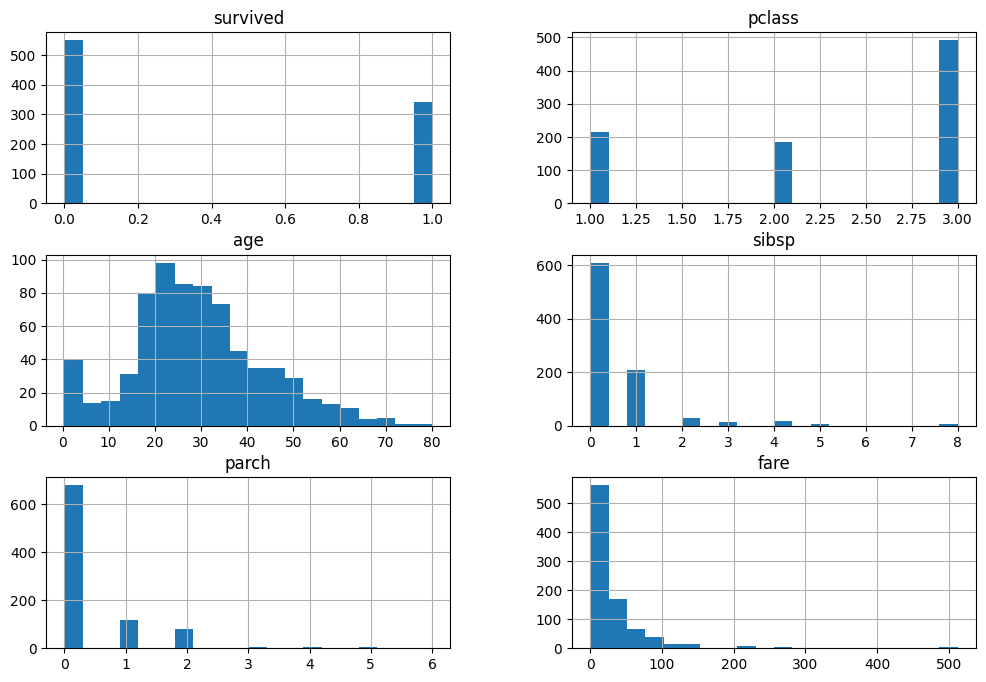

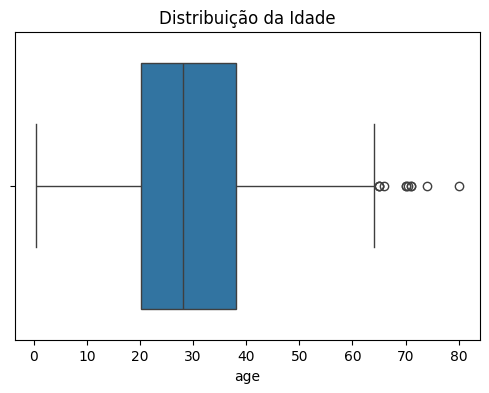

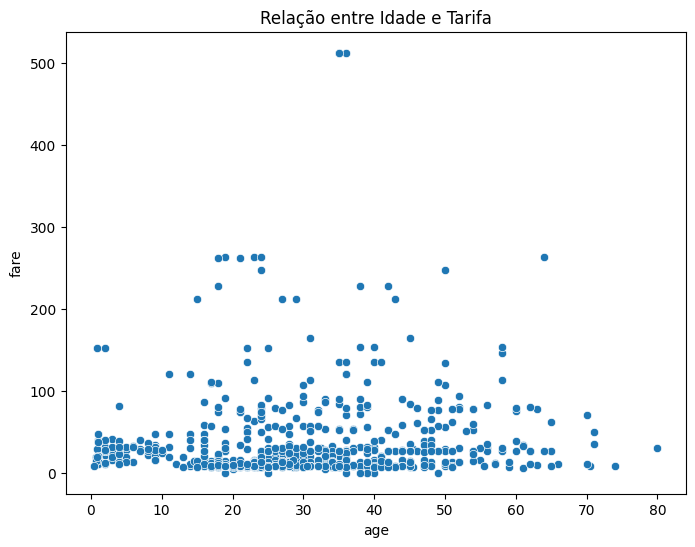

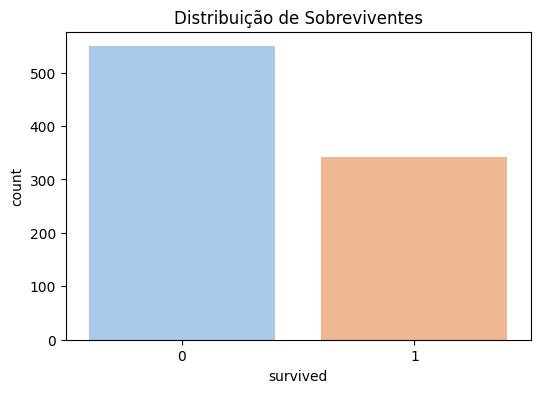

In [5]:
df.hist(figsize=(12, 8), bins=20)
plt.show()

# Boxplot de idade
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'])
plt.title("Distribuição da Idade")
plt.show()

# Gráfico de dispersão entre idade e tarifa
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="fare", data=df)
plt.title("Relação entre Idade e Tarifa")
plt.show()

# Contagem de sobreviventes
plt.figure(figsize=(6, 4))
sns.countplot(x="survived", hue="survived", data=df, palette="pastel", legend=False)
plt.title("Distribuição de Sobreviventes")
plt.show()

**Respostas:**
- Há algum atributo com uma distribuição muito desigual?

R: Sim, a distribuição de `sibsp` e `parch` é desigual, com a maioria dos valores concentrados em 0, indicando que a maioria dos passageiros não tinha irmãos ou cônjuges a bordo.
- Como os outliers afetam a distribuição da **idade**?

R: Os outliers na distribuição da idade podem distorcer a média, tornando-a maior do que a mediana. Isso pode levar a uma interpretação errônea da idade média dos passageiros. A mediana é uma medida mais robusta para representar a idade central, pois não é tão afetada por valores extremos.
- Há alguma correlação visível entre **idade** e **tarifa**?

R: Não há uma correlação clara entre idade e tarifa, mas passageiros mais velhos tendem a pagar tarifas mais altas.
- Qual é a proporção de sobreviventes no dataset?

R: A proporção de sobreviventes no dataset é de aproximadamente 38,4%.


## 📉 **Parte 5: Identificando e Lidando com Outliers**  

1. Utilize um boxplot para identificar possíveis outliers nas colunas numéricas, como **idade**, **tarifa**, **número de irmãos/cônjuges** e **número de pais/filhos a bordo**.  
2. Utilize o **IQR** (Intervalo Interquartil) para identificar e tratar outliers nas colunas numéricas.  
3. Ajuste os outliers para valores mais próximos ao limite superior ou inferior (se necessário).  
4. Plote novamente os gráficos de boxplot após o ajuste.

```python
# Função para identificar outliers usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Identificando e removendo outliers na coluna 'age'
df_no_outliers = remove_outliers(df, 'age')

# Boxplot antes e depois da remoção dos outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title("Antes da Remoção de Outliers (Idade)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['age'])
plt.title("Depois da Remoção de Outliers (Idade)")

plt.tight_layout()
plt.show()
```

🎁 **Tarefa:**  
- Quais colunas apresentam outliers?  
- O que acontece com a distribuição da **idade** após a remoção de outliers?  
- Como a remoção de outliers afeta a análise de correlação?  

---


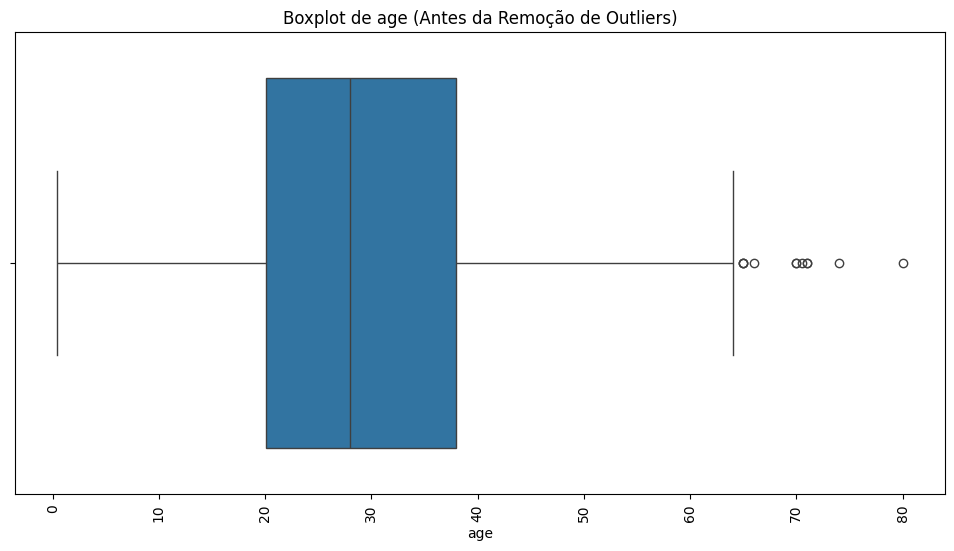

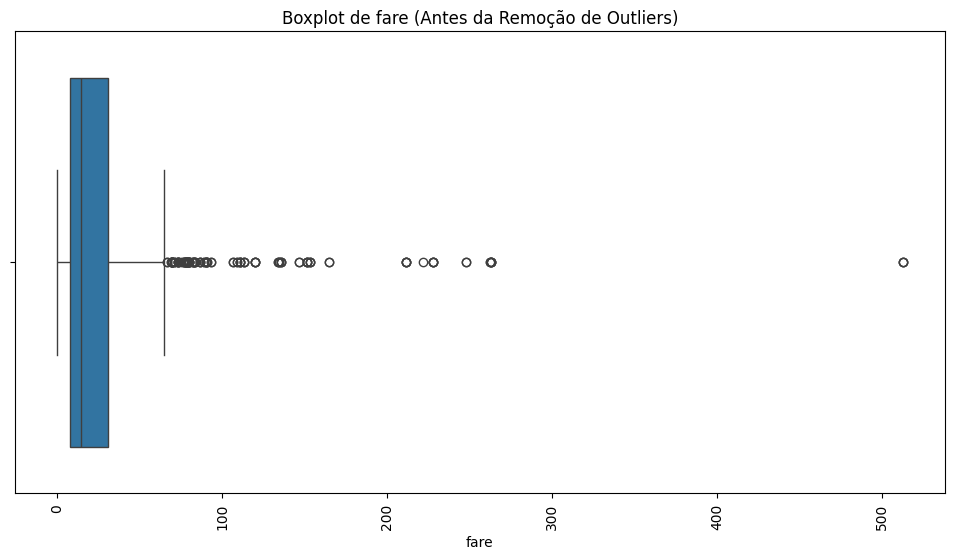

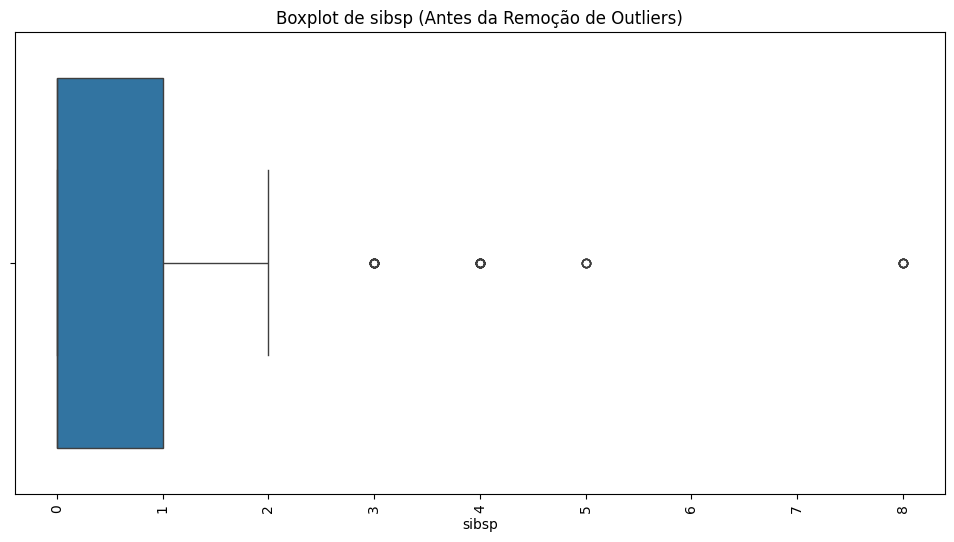

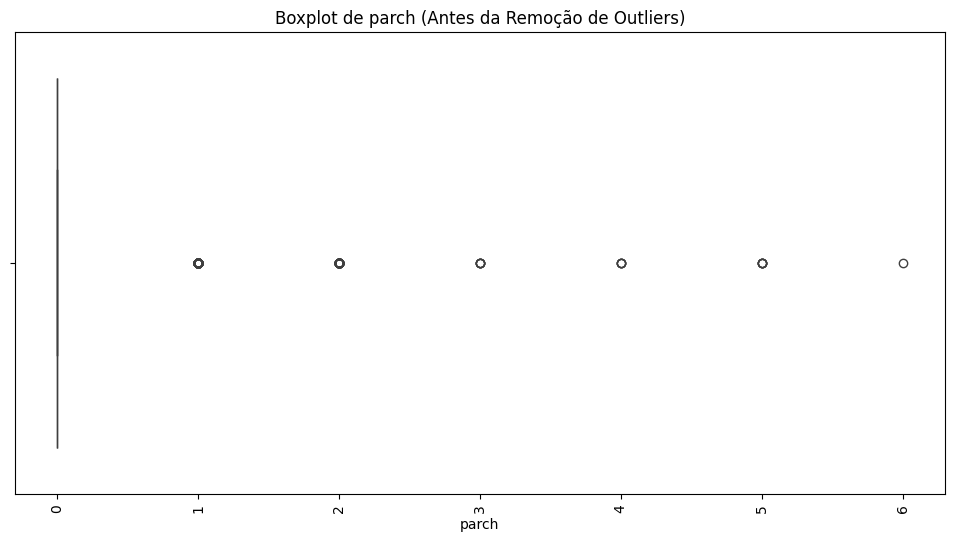

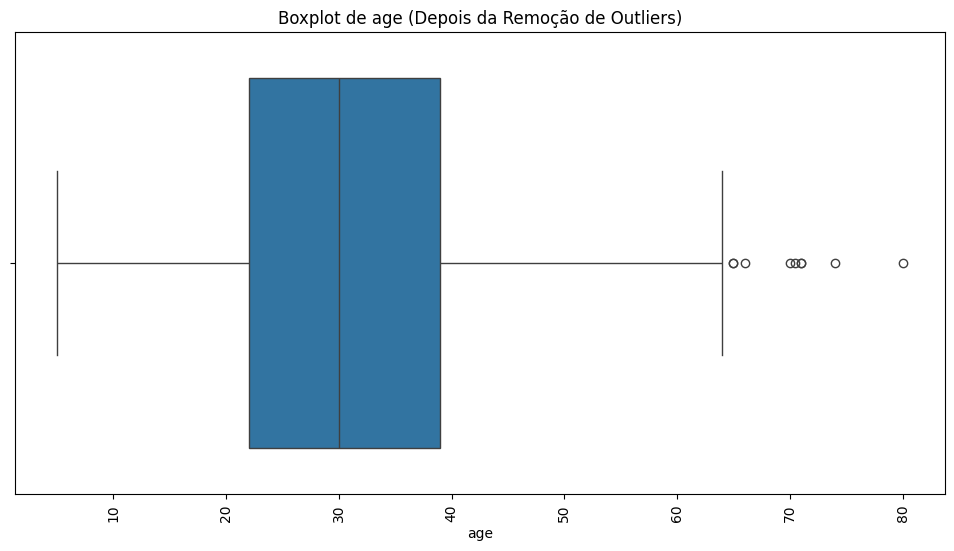

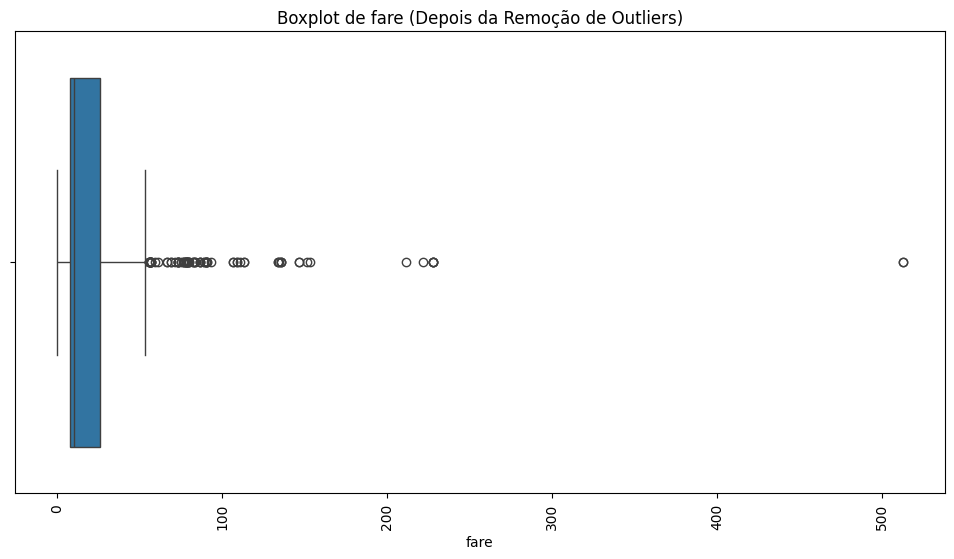

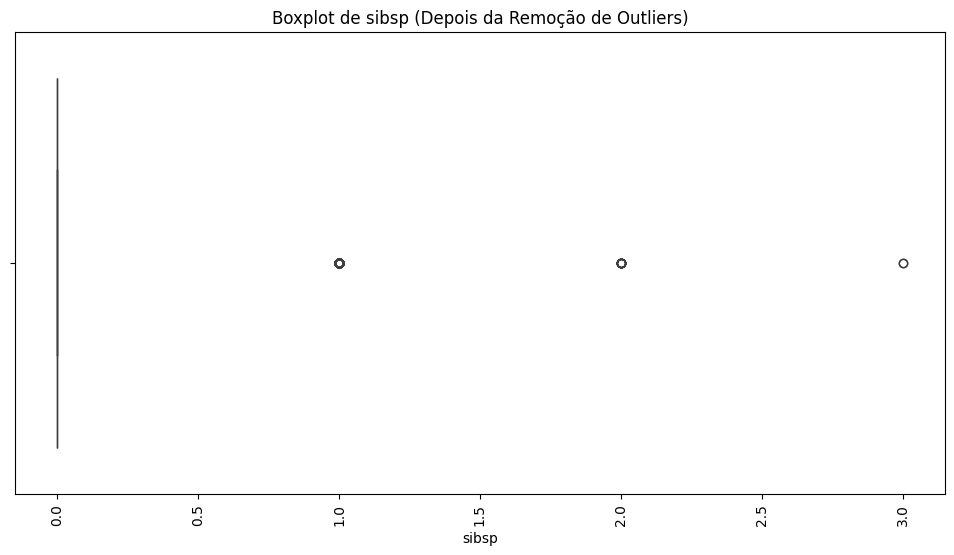

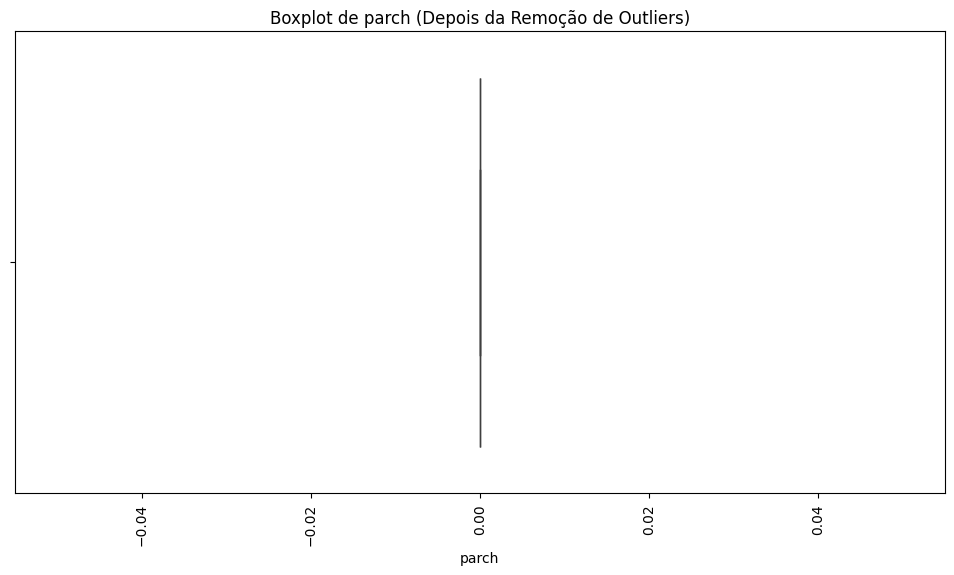

In [6]:
columns = ['age', 'fare', 'sibsp', 'parch']

# Boxplot para colunas
for col in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col} (Antes da Remoção de Outliers)")
    plt.xticks(rotation=90)


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# Removendo outliers apenas nas colunas numéricas
for col in columns:
    df_no_outliers = remove_outliers(df, col)

# Visualizando os boxplots depois da remoção de outliers
for col in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f"Boxplot de {col} (Depois da Remoção de Outliers)")
    plt.xticks(rotation=90)
    plt.show()

**Respostas:**
- Quais colunas apresentam outliers?

R: As colunas `age`, `fare`, `sibsp` e `parch` apresentam outliers, como indicado pelos boxplots.
- O que acontece com a distribuição da **idade** após a remoção de outliers?

R: A distribuição da idade fica mais homogênea após a remoção de outliers.

- Como a remoção de outliers afeta a análise de correlação?

R: A remoção de outliers pode melhorar a análise de correlação, tornando-a mais representativa da relação entre os atributos. Isso pode ajudar a identificar correlações mais precisas entre as variáveis, especialmente em casos onde os outliers distorcem a relação esperada.


## 📐 **Parte 6: Análise de Correlação e Ajuste de Dados**  

1. Construa um mapa de calor para observar as correlações entre os atributos numéricos após o tratamento de dados ausentes e outliers.  
2. Identifique os atributos que possuem maior correlação com a variável alvo **"survived"**.  
3. Ajuste a análise para interpretar essas correlações em termos de decisões que podem ser feitas com base nos dados.

```python
# Mapa de calor de correlação após tratamento de dados ausentes e outliers
plt.figure(figsize=(10, 6))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor das Correlações (Sem Outliers)")
plt.show()
```

🎁 **Tarefa:**  
- Quais atributos parecem estar mais correlacionados com a variável **"survived"**?  
- Como essas correlações podem ajudar na previsão de sobreviventes?  
- O que pode ser ajustado na coleta de dados ou pré-processamento para melhorar essa análise?

---

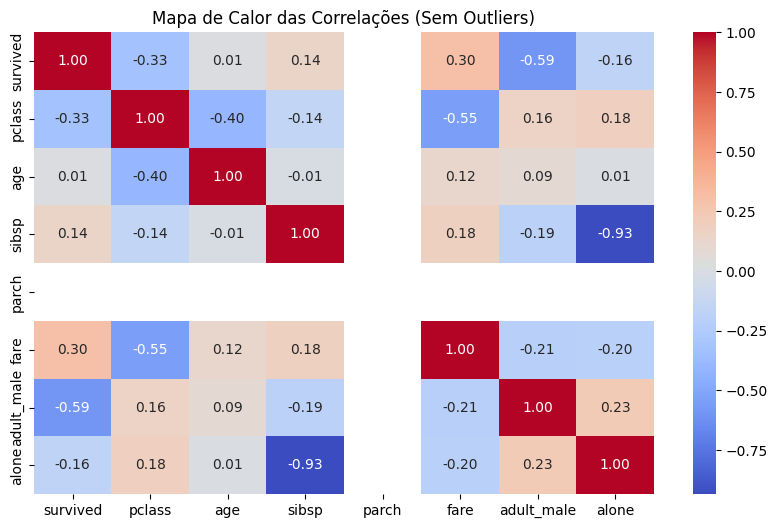

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_no_outliers.corr(numeric_only=True),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor das Correlações (Sem Outliers)")
plt.show()

**Respostas:**
- Quais atributos parecem estar mais correlacionados com a variável **"survived"**?

R: O atributo adult_male parece estar negativamente correlacionado com a variável `survived`. Isso sugere que homens adultos tiveram menor chance de sobrevivência. Além disso, menores classes estão associadas a tarifas mais baixas e consequentemente menor chance de sobrevivência.
- Como essas correlações podem ajudar na previsão de sobreviventes?

R: Essas correlações podem ajudar a identificar quais características dos passageiros estão associadas a uma maior chance de sobrevivência. Por exemplo, se um passageiro é mulher ou criança, ele pode ter uma maior probabilidade de sobreviver, enquanto homens adultos podem ter menor chance.
- O que pode ser ajustado na coleta de dados ou pré-processamento para melhorar essa análise?

R: Melhorar a coleta de dados, garantindo que informações relevantes sejam registradas, como condições de saúde, localização no navio e outros fatores que podem influenciar a sobrevivência. Além disso, o tratamento de dados ausentes e outliers deve ser feito com cuidado para não distorcer a análise.

## 📊 **Parte 7: Padronização de Dados Não Numéricos (Sem Afetar o Target)**  

### 🎯 **Objetivo**  
Nesta tarefa, você aplicará a **padronização** nos dados **não numéricos** do Titanic Dataset, utilizando técnicas de codificação, enquanto preserva a variável **"survived"** como a variável target.

### 📝 **Passos a serem seguidos**  

1. **Identificar as variáveis não numéricas** no dataset, excluindo a variável target **"survived"**.  
2. **Aplicar a codificação de variáveis categóricas**: Utilize `LabelEncoder` ou `OneHotEncoder` para transformar as variáveis categóricas em valores numéricos.  
3. **Padronizar os dados**: Após a codificação, aplique a **padronização** nos dados transformados utilizando `StandardScaler`.  

```python

# Criando uma cópia do dataframe
df2 = df.copy()

######################### Lidando com valores ausentes #########################

# Verificando valores ausentes
df2.isnull().sum()

# Identificando as colunas numéricas e categóricas
colunas_numericas = df2.select_dtypes(include=['float64', 'int64']).columns

# Identificar as colunas não numéricas, excluindo o target 'survived'
colunas_categoricas = ['sex', 'embarked', 'class', 'who', 'alone', 'deck', 'adult_male', 'embark_town', 'alive', 'alone']  # Ajuste conforme necessário

# Imputar valores NaN nas colunas numéricas com a média
imputer_numerico = SimpleImputer(strategy='mean')
df2[colunas_numericas] = imputer_numerico.fit_transform(df2[colunas_numericas])

# Imputar valores NaN nas colunas categóricas com a moda
imputer_categorico = SimpleImputer(strategy='most_frequent')
df2[colunas_categoricas] = imputer_categorico.fit_transform(df2[colunas_categoricas])

# Agora não temos mais valores ausentes
df2.isnull().sum()

###################### Corificando variáveis categóricas #######################

# Codificação de variáveis categóricas com LabelEncoder
label_encoder = LabelEncoder()
for col in colunas_categoricas:
    df2[col] = label_encoder.fit_transform(df2[col].astype(str))
df2

###################### Padronizando #######################

Separando os previsores (todas as colunas, exceto 'survived')
previsores = df2.drop(columns=['survived'])

# Separando a variável alvo ('survived')
supervisor = df2['survived']

# Padronização dos dados após a codificação
scaler = StandardScaler()
previsores_escalonados = scaler.fit_transform(previsores)
previsores_escalonados = pd.DataFrame(previsores_escalonados, columns=previsores.columns) # Transformando em dataframe
previsores_escalonados

# Descrevendo os valores
previsores_escalonados.describe()
```

### 🎁 **Tarefa:**  
- Quais colunas foram identificadas como não numéricas, excluindo **"survived"**?  
- Após a codificação, quais valores numéricos as variáveis categóricas receberam? Cite um exemplo.
- Como a padronização afetou os valores das variáveis categóricas codificadas?  

In [8]:
# Criando uma cópia do dataframe original
df2 = df.copy()

# Identificando as colunas numéricas
numeric_columns = df2.select_dtypes(include=[np.number]).columns

# Identificando as colunas não numéricas, excluindo a coluna do target 'survived'
non_numeric_columns = df2.select_dtypes(exclude=[np.number]).columns.tolist()
if 'survived' in non_numeric_columns:
    non_numeric_columns.remove('survived')

# Exibindo as colunas categóricas identificadas
print(f"\nColunas não numéricas identificadas: {non_numeric_columns}")

######################### Lidando com valores ausentes #########################

# Verificando valores ausentes antes
print(f"\nValores ausentes antes da imputação:\n{df2.isnull().sum()}")

# Imputando valores numéricos ausentes com a média
imputer_numerico = SimpleImputer(strategy='mean')
df2[numeric_columns] = imputer_numerico.fit_transform(df2[numeric_columns])

# Imputando valores categóricos ausentes com a moda
imputer_categorico = SimpleImputer(strategy='most_frequent')
df2[non_numeric_columns] = imputer_categorico.fit_transform(df2[non_numeric_columns])

# Verificando se ainda há valores ausentes
print(f"\nValores ausentes após a imputação:\n{df2.isnull().sum()}")

######################### Codificação de variáveis categóricas #########################

df_original = df.copy()

# Exibindo valores antes da codificação de um exemplo de coluna
exemplo_coluna = non_numeric_columns[5]
print(f"\nExemplo antes da codificação - coluna '{exemplo_coluna}':")
print(df_original[exemplo_coluna].value_counts().head())

# Aplicando LabelEncoder para todas as colunas categóricas
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    df2[col] = label_encoder.fit_transform(df2[col].astype(str))

# Exibindo valores depois da codificação da mesma coluna
print(f"\nExemplo depois da codificação - coluna '{exemplo_coluna}':")
print(df2[exemplo_coluna].value_counts().head())

######################### Padronização #########################

# Separando os previsores (features) e o target
previsores = df2.drop(columns=['survived'])
supervisor = df2['survived']

# Exibindo uma amostra antes da padronização
print("\nExemplo de valores antes da padronização:")
print(previsores.head())

# Aplicando padronização
scaler = StandardScaler()
previsores_escalonados = scaler.fit_transform(previsores)

# Convertendo de volta para DataFrame com os nomes das colunas
previsores_escalonados = pd.DataFrame(previsores_escalonados, columns=previsores.columns)

# Exibindo uma amostra após a padronização
print("\nExemplo de valores após a padronização:")
print(previsores_escalonados.head())

# Estatísticas descritivas após padronização
print("\nResumo estatístico após a padronização:")
print(previsores_escalonados.describe())


Colunas não numéricas identificadas: ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Valores ausentes antes da imputação:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Valores ausentes após a imputação:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Exemplo antes da codificação - coluna 'deck':
deck
C    59
B    47
D    33
E    32
A    15
Name: count, dtype: int64

Exemplo depois da codificação - coluna 'deck':
deck
2    747
1     47
3     33
4     32
0     15
Name: count, dt

**Respostas:**
- Quais colunas foram identificadas como não numéricas, excluindo **"survived"**?

R: As colunas não numéricas identificadas foram: `sex`, `embarked`, `class`, `who`, `deck`, `adult_male`, `embark_town`, `alive` e `alone`.
- Após a codificação, quais valores numéricos as variáveis categóricas receberam? Cite um exemplo.

R: Por exemplo, na coluna 'deck', os valores originais como 'C', 'B', 'D', 'E', 'A' foram transformados em valores inteiros como 2, 1, 3, 4, 0. O valor mais frequente (nesse caso 'C') foi atribuído a grande parte das instâncias faltantes, resultando em 747 ocorrências do valor 2.

Antes da codificação - coluna `deck`:
| C | B | D | E | A |
|---|---|---|---|---|
| 59 | 47 | 33 | 32 | 15 |

Depois da codificação - coluna `deck`:
| 2 | 1 | 3 | 4 | 0 |
|---|---|---|---|---|
| 747 | 47 | 33 | 32 | 15 |

- Como a padronização afetou os valores das variáveis categóricas codificadas?

R: A padronização transformou os valores categóricos codificados (inteiros) em valores com média próxima de 0 e desvio padrão 1, aplicando a fórmula:

\($ z = \frac{x - \mu}{\sigma} $\)

Essa transformação facilita o aprendizado dos modelos ao garantir que todas as variáveis (inclusive as categóricas codificadas) estejam na mesma escala, reduzindo o viés de variáveis com maior magnitude.

Nota: Em modelos sensíveis à escala (como KNN ou redes neurais), essa etapa é crucial, mesmo para variáveis originalmente categóricas que foram codificadas.

## 📉 **Parte 8: Redução de Dimensionalidade com PCA**

Para reduzir a dimensionalidade de maneira eficaz, é desejável que você consiga uma boa representação dos dados com um número menor de componentes. Se, por exemplo, os dois primeiros componentes explicam 95% ou mais da variância, isso indica que você pode usar esses dois componentes e ainda manter a maior parte das informações dos dados.

1. Aplique a **PCA** para reduzir a dimensionalidade dos dados após a padronização.
2. Defina o número de componentes principais desejado (por exemplo, 2 componentes para visualização).

```python
# Aplicando PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
previsores_pca = pca.fit_transform(previsores)

# Explicando a variância
print(f"Explained variance ratio for each component: {pca.explained_variance_ratio_}")
# Soma das variáveis explicativas. Vai explicar 99% com estas colunas
pca.explained_variance_ratio_.sum()
```

🎁 **Tarefa:**
- Como a redução de dimensionalidade afeta a visualização dos dados?
- Usando dois componentes no PCA, quais foram os valores? Por que o primeiro componente principal explica muito mais variância do que o segundo?
- Com apenas dois componentes principais, conseguimos preservar a maior parte da variabilidade dos dados?

---

Explained variance ratio for each component: [0.93450033 0.06345221]
Total explained variance ratio: 0.9979525394781763


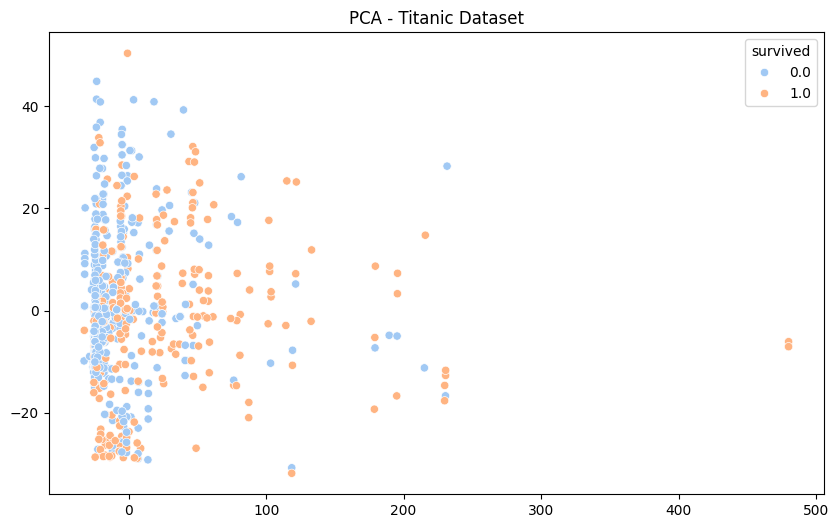

In [9]:
pca = PCA(n_components=2)
previsores_pca = pca.fit_transform(previsores)

# Explicando a variância
print(f"Explained variance ratio for each component: {pca.explained_variance_ratio_}")
# Soma das variáveis explicativas. Vai explicar 99% com estas colunas
print("Total explained variance ratio:", pca.explained_variance_ratio_.sum())

#Visualizando os dados após a redução de dimensionalidade
plt.figure(figsize=(10, 6))
sns.scatterplot(x=previsores_pca[:, 0], y=previsores_pca[:, 1], hue=supervisor, palette="pastel")
plt.title("PCA - Titanic Dataset")
plt.show()

**Respostas:**
- Como a redução de dimensionalidade afeta a visualização dos dados?

R: A redução de dimensionalidade transforma os dados originais de 14 dimensões para apenas 2 dimensões, permitindo uma visualização bidimensional que seria impossível com os dados originais. No gráfico gerado, podemos observar uma clara separação entre os grupos de sobreviventes (em azul) e não sobreviventes (em laranja), principalmente ao longo do primeiro componente principal. Esta visualização revela padrões que estavam "escondidos" nas múltiplas dimensões originais, tornando possível identificar visualmente potenciais agrupamentos e tendências relacionadas à sobrevivência.

- Usando dois componentes no PCA, quais foram os valores? Por que o primeiro componente principal explica muito mais variância do que o segundo?

R: Os valores específicos da variância explicada pelos dois componentes principais são: 93.45% para o primeiro componente e 6,34% para o segundo, como indicado na saída Explained variance ratio for each component: [0.93450033 0.06345221]. O primeiro componente explica significativamente mais variância porque o PCA busca primeiramente a direção de máxima variação nos dados. No dataset do Titanic, esta direção provavelmente captura as relações entre variáveis fortemente correlacionadas como classe, tarifa e sobrevivência, que juntas representam a maior fonte de variabilidade. As variáveis como sexo e idade possivelmente têm grande peso neste componente, refletindo a política "mulheres e crianças primeiro" que influenciou fortemente os padrões de sobrevivência.

- Com apenas dois componentes principais, conseguimos preservar a maior parte da variabilidade dos dados?

R: Sim, com apenas dois componentes principais, conseguimos preservar surpreendentemente 99,79% da variabilidade total dos dados originais. Este resultado é excepcionalmente alto e incomum em muitos conjuntos de dados reais, onde geralmente são necessários mais componentes para atingir tal nível de preservação. Isso indica uma forte estrutura de correlação no dataset do Titanic, onde praticamente toda a informação relevante pode ser representada em apenas duas dimensões. Essa alta taxa de preservação sugere que modelos preditivos construídos usando apenas esses dois componentes provavelmente teriam desempenho semelhante aos modelos que utilizam todas as 14 variáveis originais, oferecendo uma oportunidade de simplificação sem perda significativa de informação preditiva.